In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sklearn

In [4]:
import seaborn as sb

In [5]:
df=pd.read_csv('Solar_Prediction.csv')
df.head()

Unnamed: 0    UNIXTime                   Date      Time  Radiation  \
0           0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21   
1           1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21   
2           2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23   
3           3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21   
4           4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17   

   Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise  \
0         48.0     30.46      59.0                  177.39   5.62    06:13:00   
1         48.0     30.46      58.0                  176.78   3.37    06:13:00   
2         48.0     30.46      57.0                  158.75   3.37    06:13:00   
3         48.0     30.46      60.0                  137.71   3.37    06:13:00   
4         48.0     30.46      62.0                  104.95   5.62    06:13:00   

  TimeSunSet  
0   18:13:00  
1   18:13:00  
2   18:13:00  
3   18:13:00  
4   18:13:00

In [6]:
from datetime import datetime
df['date&time']=pd.to_datetime(df[ 'Date'] + ' ' + df['Time'])

df['year']=df['date&time'].dt.year
df['month']=df['date&time'].dt.month
df['day']=df['date&time'].dt.day
df['hour']=df['date&time'].dt.hour
df['minute']=df['date&time'].dt.minute
df['second']=df['date&time'].dt.second

df['sunriseTime']=pd.to_datetime(df['TimeSunRise'],format='%H:%M:%S')
df['sunsetTime']=pd.to_datetime(df['TimeSunSet'],format='%H:%M:%S')

df['sunriseHour']=df['sunriseTime'].dt.hour
df['sunriseMinute']=df['sunriseTime'].dt.minute
df['sunsetHour']=df['sunsetTime'].dt.hour
df['sunsetMinute']=df['sunsetTime'].dt.minute

df.drop(['Unnamed: 0','Date','Time','date&time','TimeSunRise','TimeSunSet','sunriseTime','sunsetTime'],axis=1, inplace=True)
df.head()

C:\Users\Richa\AppData\Local\Temp\ipykernel_3484\1330112451.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date&time']=pd.to_datetime(df[ 'Date'] + ' ' + df['Time'])


UNIXTime  Radiation  Temperature  Pressure  Humidity  \
0  1475229326       1.21         48.0     30.46      59.0   
1  1475229023       1.21         48.0     30.46      58.0   
2  1475228726       1.23         48.0     30.46      57.0   
3  1475228421       1.21         48.0     30.46      60.0   
4  1475228124       1.17         48.0     30.46      62.0   

   WindDirection(Degrees)  Speed  year  month  day  hour  minute  second  \
0                  177.39   5.62  2016      9   29    23      55      26   
1                  176.78   3.37  2016      9   29    23      50      23   
2                  158.75   3.37  2016      9   29    23      45      26   
3                  137.71   3.37  2016      9   29    23      40      21   
4                  104.95   5.62  2016      9   29    23      35      24   

   sunriseHour  sunriseMinute  sunsetHour  sunsetMinute  
0            6             13          18            13  
1            6             13          18            13  
2            6             13          18            13  
3            6             13          18            13  
4            6             13          18            13

In [7]:
df.isnull().sum()

UNIXTime                    0
Radiation                   0
Temperature               200
Pressure                  149
Humidity                  225
WindDirection(Degrees)    125
Speed                     140
year                        0
month                       0
day                         0
hour                        0
minute                      0
second                      0
sunriseHour                 0
sunriseMinute               0
sunsetHour                  0
sunsetMinute                0
dtype: int64

In [8]:
da=df.dropna()
da.isnull().sum()

UNIXTime                  0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
sunriseHour               0
sunriseMinute             0
sunsetHour                0
sunsetMinute              0
dtype: int64

In [9]:
cor=da.corr()
cor

UNIXTime  Radiation  Temperature  Pressure  Humidity  \
UNIXTime                1.000000  -0.077384    -0.365183 -0.331553 -0.069590   
Radiation              -0.077384   1.000000     0.734147  0.119231 -0.222454   
Temperature            -0.365183   0.734147     1.000000  0.310873 -0.279059   
Pressure               -0.331553   0.119231     0.310873  1.000000 -0.223025   
Humidity               -0.069590  -0.222454    -0.279059 -0.223025  1.000000   
WindDirection(Degrees)  0.154640  -0.233851    -0.262443 -0.231738 -0.001625   
Speed                   0.173011   0.076396    -0.027114 -0.083840 -0.216691   
year                         NaN        NaN          NaN       NaN       NaN   
month                   0.968945  -0.089935    -0.347448 -0.341987 -0.078924   
day                     0.303721   0.033249    -0.142440 -0.028205  0.026087   
hour                    0.000403   0.004426     0.198433  0.090984  0.079165   
minute                  0.000294  -0.000336    -0.002036  0.002799  0.000373   
second                  0.243208  -0.035983    -0.047925 -0.035279 -0.020658   
sunriseHour                  NaN        NaN          NaN       NaN       NaN   
sunriseMinute           0.981779  -0.088990    -0.376864 -0.380085 -0.030223   
sunsetHour             -0.817757   0.045139     0.297422  0.150912  0.150870   
sunsetMinute            0.585982  -0.037763    -0.241794 -0.118778 -0.121934   

                        WindDirection(Degrees)     Speed  year     month  \
UNIXTime                              0.154640  0.173011   NaN  0.968945   
Radiation                            -0.233851  0.076396   NaN -0.089935   
Temperature                          -0.262443 -0.027114   NaN -0.347448   
Pressure                             -0.231738 -0.083840   NaN -0.341987   
Humidity                             -0.001625 -0.216691   NaN -0.078924   
WindDirection(Degrees)                1.000000  0.071698   NaN  0.185215   
Speed                                 0.071698  1.000000   NaN  0.148339   
year                                       NaN       NaN   NaN       NaN   
month                                 0.185215  0.148339   NaN  1.000000   
day                                  -0.086103  0.127267   NaN  0.058927   
hour                                 -0.077821 -0.057874   NaN -0.005938   
minute                               -0.000561 -0.000466   NaN -0.000175   
second                               -0.033535 -0.027383   NaN  0.238329   
sunriseHour                                NaN       NaN   NaN       NaN   
sunriseMinute                         0.178655  0.166243   NaN  0.953027   
sunsetHour                           -0.080756 -0.157869   NaN -0.784067   
sunsetMinute                          0.070862  0.119501   NaN  0.542596   

                             day      hour    minute    second  sunriseHour  \
UNIXTime                0.303721  0.000403  0.000294  0.243208          NaN   
Radiation               0.033249  0.004426 -0.000336 -0.035983          NaN   
Temperature            -0.142440  0.198433 -0.002036 -0.047925          NaN   
Pressure               -0.028205  0.090984  0.002799 -0.035279          NaN   
Humidity                0.026087  0.079165  0.000373 -0.020658          NaN   
WindDirection(Degrees) -0.086103 -0.077821 -0.000561 -0.033535          NaN   
Speed                   0.127267 -0.057874 -0.000466 -0.027383          NaN   
year                         NaN       NaN       NaN       NaN          NaN   
month                   0.058927 -0.005938 -0.000175  0.238329          NaN   
day                     1.000000 -0.008746  0.000707  0.075039          NaN   
hour                   -0.008746  1.000000 -0.004927  0.001955          NaN   
minute                  0.000707 -0.004927  1.000000  0.003080          NaN   
second                  0.075039  0.001955  0.003080  1.000000          NaN   
sunriseHour                  NaN       NaN       NaN       NaN          NaN   
sunriseMinute           0.291

Text(0.5, 1.0, 'Correlation')

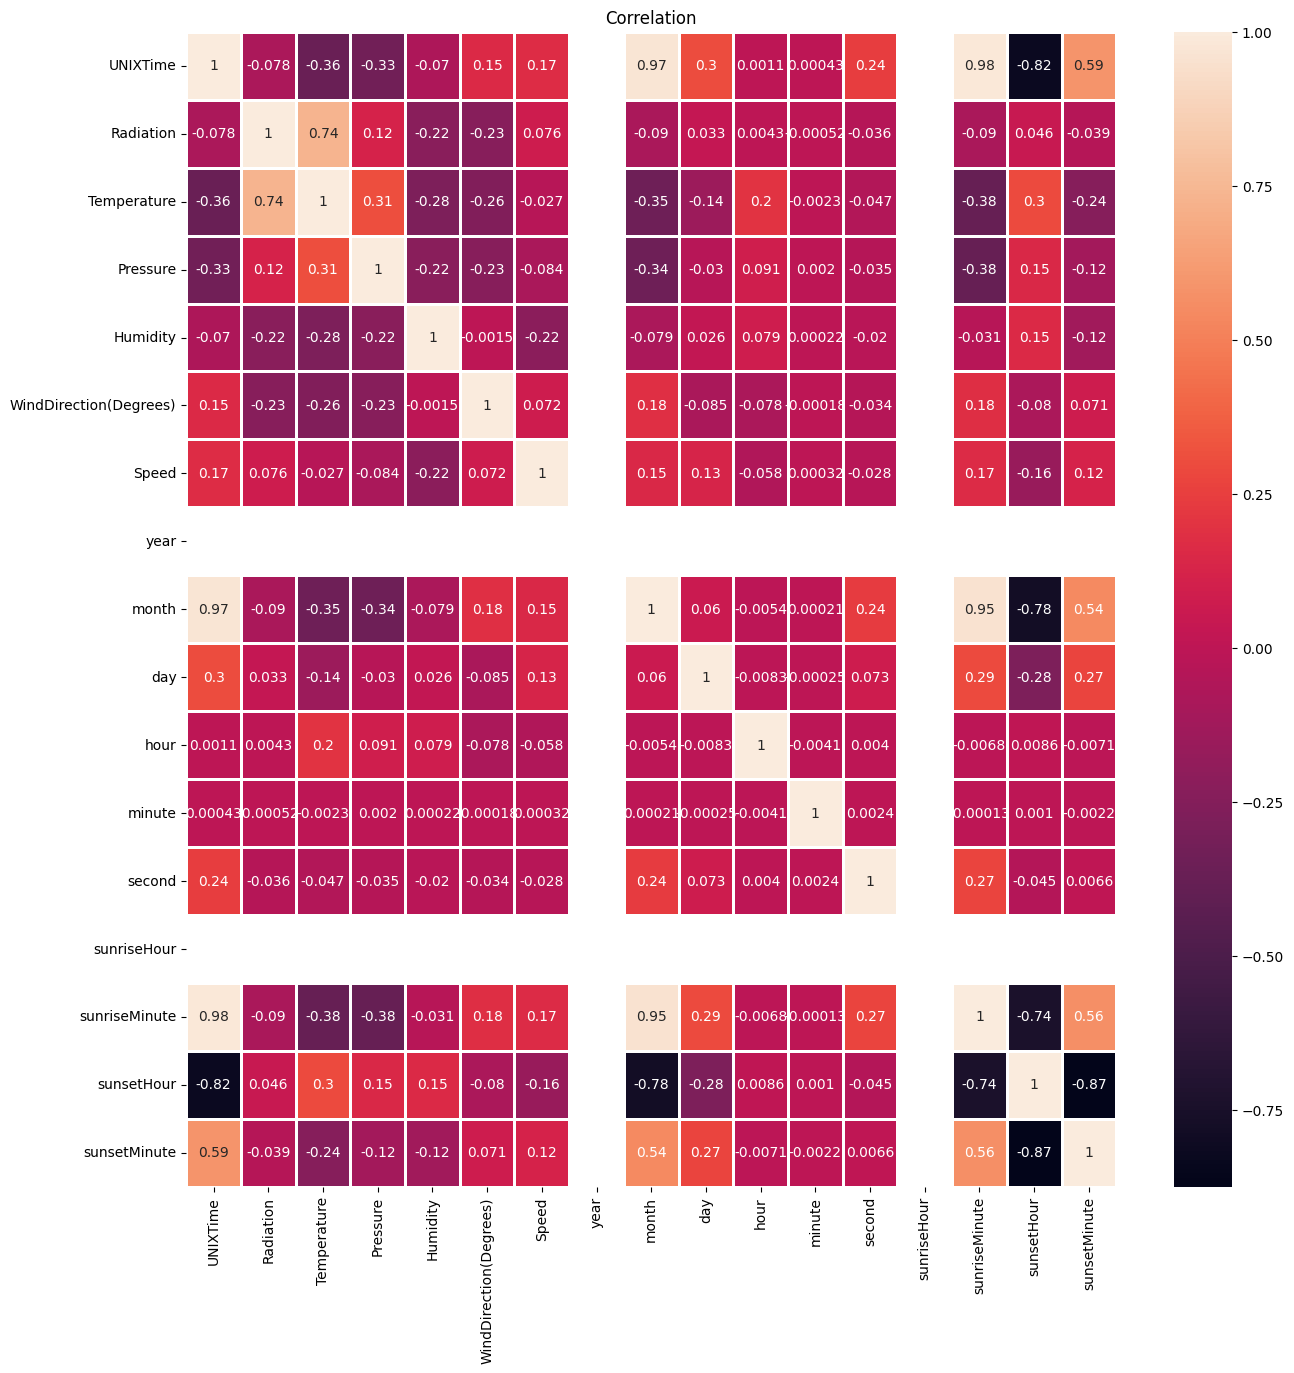

In [10]:
fig= plt.figure(figsize=(15,15))
sb.heatmap(df.corr(),annot=True,linewidths=1)
plt.title('Correlation')

<Figure size 2000x1000 with 0 Axes>

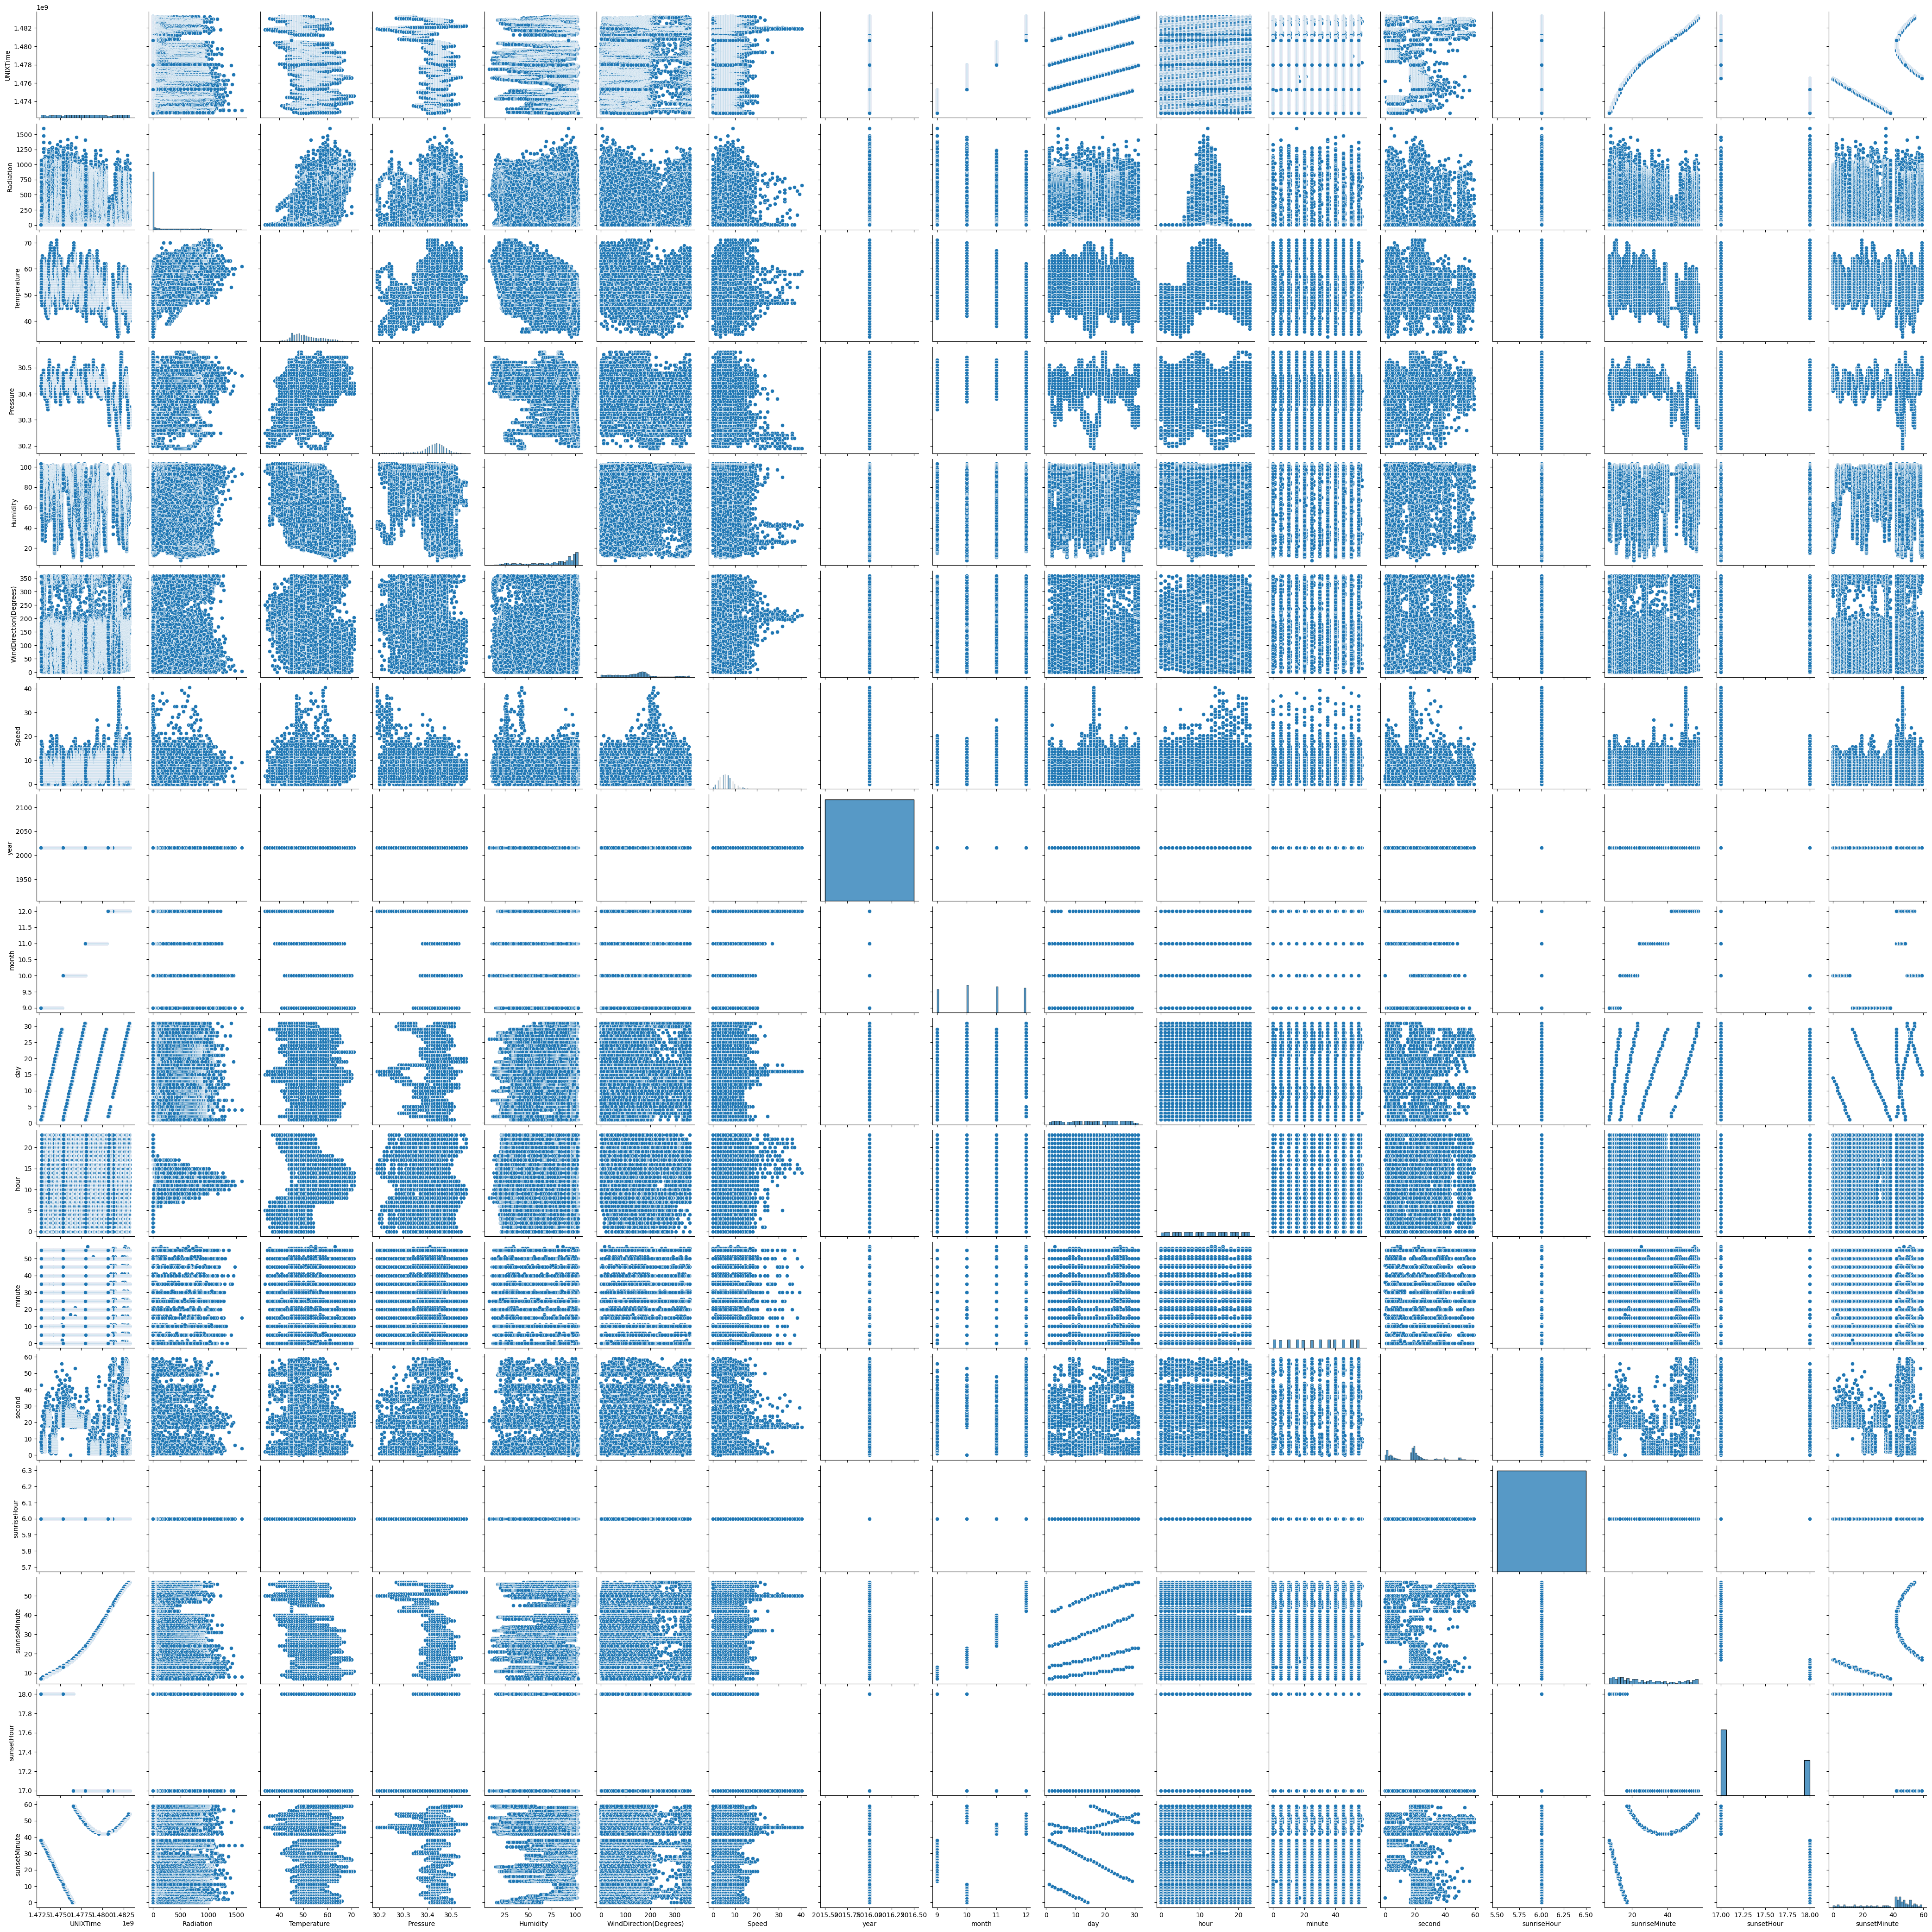

In [11]:
fig= plt.figure(figsize=(20,10))
sb.pairplot(df)

R2 Score: 0.7155086609340906
Mean Squared Error: 27831.278403044966
Mean Absolute Error: 91.20702469917669


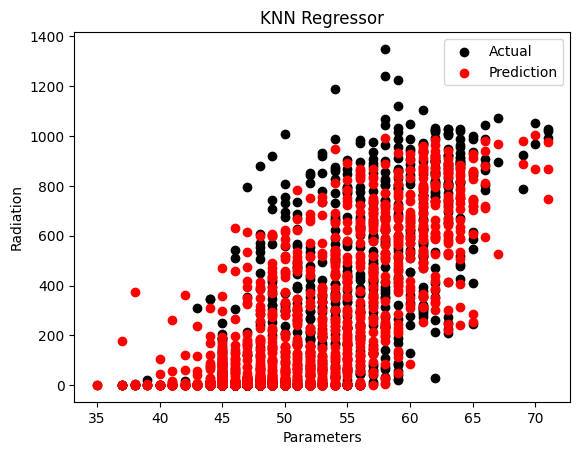

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

a5=da[['Temperature','Pressure','WindDirection(Degrees)', 'Speed','Humidity','month','day','second','hour','minute','sunriseMinute','sunsetHour','sunsetMinute']]
b5=da['Radiation']

a5_train,a5_test, b5_train,b5_test = train_test_split(a5,b5,test_size=0.05, random_state=15)
k_value=5
model=KNeighborsRegressor(n_neighbors=k_value)
model.fit(a5_train,b5_train)
b5_predicted= model.predict(a5_test)
R6=r2_score(b5_test,b5_predicted)
print(f'R2 Score: {R6}')
mse6=mean_squared_error(b5_test,b5_predicted)
print(f'Mean Squared Error: {mse6}')
mae6=mean_absolute_error(b5_test,b5_predicted)
print(f'Mean Absolute Error: {mae6}')


plt.xlabel('Parameters')
plt.ylabel('Radiation')
plt.scatter(a5_test['Temperature'],b5_test,color='black',label='Actual')
plt.scatter(a5_test['Temperature'],b5_predicted,color='red',label='Prediction')
plt.title('KNN Regressor')
plt.legend()
plt.show()

R2 Score: 0.8979258917606984
Mean Squared Error: 10000.160755034833
Mean Absolute Error: 34.142241925269154


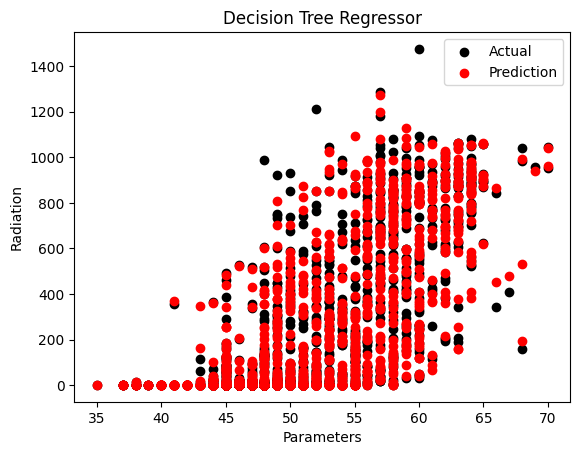

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

a2=da[['Temperature','Pressure','WindDirection(Degrees)', 'Speed','Humidity','month','day','second','hour','minute','sunriseMinute','sunsetHour','sunsetMinute']]
b2=da['Radiation']

a2_train,a2_test, b2_train,b2_test = train_test_split(a2,b2,test_size=0.05, random_state=40)
tree_model=DecisionTreeRegressor(random_state=30)
tree_model.fit(a2_train,b2_train)
b2_predicted_tree= tree_model.predict(a2_test)
R=r2_score(b2_test,b2_predicted_tree)
print(f'R2 Score: {R}')
mse=mean_squared_error(b2_test,b2_predicted_tree)
print(f'Mean Squared Error: {mse}')
mae=mean_absolute_error(b2_test,b2_predicted_tree)
print(f'Mean Absolute Error: {mae}')


plt.xlabel('Parameters')
plt.ylabel('Radiation')
plt.scatter(a2_test['Temperature'],b2_test,color='black',label='Actual')
plt.scatter(a2_test['Temperature'],b2_predicted_tree,color='red',label='Prediction')
plt.title('Decision Tree Regressor')
plt.legend()
plt.show()


R2 Score: 0.9454540947575243
Mean Squared Error: 5427.355139721152
Mean Absolute Error: 27.91268679125752


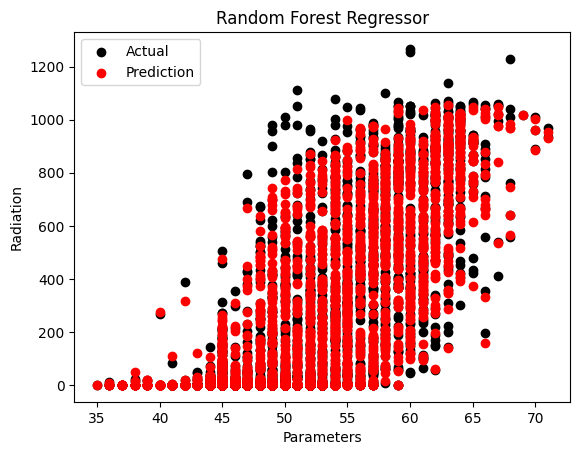

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

a3=da[['Temperature','Pressure','WindDirection(Degrees)', 'Speed','Humidity','month','day','second','hour','minute','sunriseMinute','sunsetHour','sunsetMinute']]
b3=da['Radiation']

a3_train,a3_test, b3_train,b3_test = train_test_split(a3,b3,test_size=0.1, random_state=20)
model=RandomForestRegressor(random_state=20)
model.fit(a3_train,b3_train)
b3_predicted= model.predict(a3_test)
R4=r2_score(b3_test,b3_predicted)
print(f'R2 Score: {R4}')
mse4=mean_squared_error(b3_test,b3_predicted)
print(f'Mean Squared Error: {mse4}')
mae4=mean_absolute_error(b3_test,b3_predicted)
print(f'Mean Absolute Error: {mae4}')

plt.xlabel('Parameters')
plt.ylabel('Radiation')
plt.scatter(a3_test['Temperature'],b3_test,color='black',label='Actual')
plt.scatter(a3_test['Temperature'],b3_predicted,color='red',label='Prediction')
plt.title('Random Forest Regressor')
plt.legend()
plt.show()